# Tugas Anova (One Ways - Two Ways)

Anggota : 
- Nathanael Junico Odi Perdana
- Vito Cahyadi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
dataset= pd.read_csv('insurance.csv', sep=',', encoding='ISO-8859-1')
dataset

df = pd.DataFrame(dataset)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EDA

## Featuring Engineering

In [4]:
# Mengubah kolom 'age' menjadi kategori
bins = [0, 35, 55, np.inf] 
labels = ['Dewasa Muda', 'Dewasa Tua', 'Lansia']  
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Mengubah kolom 'bmi' menjadi kategori
bins = [0, 18.5, 25, 30, np.inf] 
labels = ['Kurus', 'Normal', 'Gemuk', 'Obesitas']  
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=True)

# Mengubah kolom 'children' menjadi kategori
bins = [-1, 0, 2, 4, np.inf]  # Menambahkan -1 agar 0 termasuk dalam kategori 'Gapunya'
labels = ['None', 'Sedikit', 'Standar', 'Banyak']  
df['children_category'] = pd.cut(df['children'], bins=bins, labels=labels, right=True)

df

,age,sex,bmi,children,smoker,region,charges,age_category,bmi_category,children_category
0,19,female,27.900,0,yes,southwest,16884.92400,Dewasa Muda,Gemuk,None
1,18,male,33.770,1,no,southeast,1725.55230,Dewasa Muda,Obesitas,Sedikit
2,28,male,33.000,3,no,southeast,4449.46200,Dewasa Muda,Obesitas,Standar
3,33,male,22.705,0,no,northwest,21984.47061,Dewasa Muda,Normal,None
4,32,male,28.880,0,no,northwest,3866.85520,Dewasa Muda,Gemuk,None
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Dewasa Tua,Obesitas,Standar
1334,18,female,31.920,0,no,northeast,2205.98080,Dewasa Muda,Obesitas,None
1335,18,female,36.850,0,no,southeast,1629.83350,Dewasa Muda,Obesitas,None
1336,21,female,25.800,0,no,southwest,2007.94500,Dewasa Muda,Gemuk,None


In [23]:
# Copy dataset asli
df_new = df.copy()

# Mapping smoker: yes -> 1, no -> 0
df_new['smoker'] = df_new['smoker'].map({'yes': 1, 'no': 0})

# Cek hasil
df_new


,age,sex,bmi,children,smoker,region,charges,age_category,bmi_category,children_category
0,19,female,27.900,0,1,southwest,16884.92400,Dewasa Muda,Gemuk,None
1,18,male,33.770,1,0,southeast,1725.55230,Dewasa Muda,Obesitas,Sedikit
2,28,male,33.000,3,0,southeast,4449.46200,Dewasa Muda,Obesitas,Standar
3,33,male,22.705,0,0,northwest,21984.47061,Dewasa Muda,Normal,None
4,32,male,28.880,0,0,northwest,3866.85520,Dewasa Muda,Gemuk,None
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,Dewasa Tua,Obesitas,Standar
1334,18,female,31.920,0,0,northeast,2205.98080,Dewasa Muda,Obesitas,None
1335,18,female,36.850,0,0,southeast,1629.83350,Dewasa Muda,Obesitas,None
1336,21,female,25.800,0,0,southwest,2007.94500,Dewasa Muda,Gemuk,None


## Visualisasi Seluruh Variable dalam data

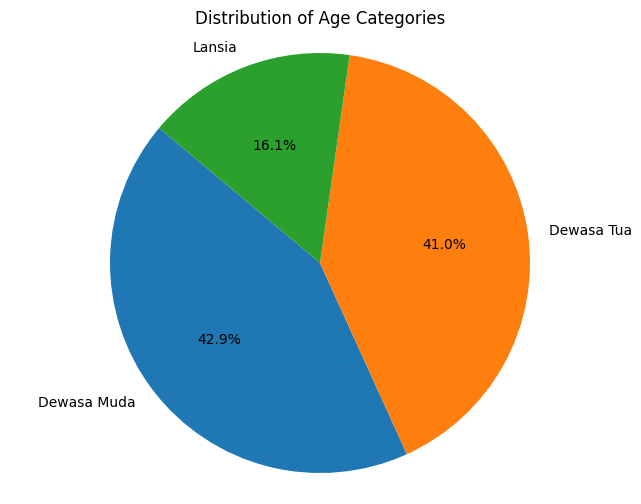

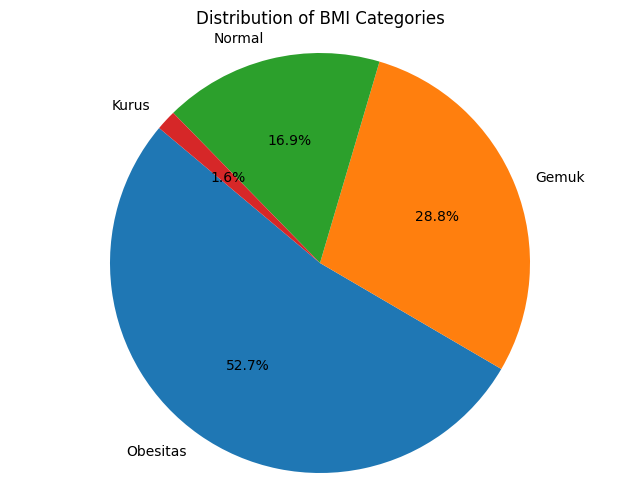

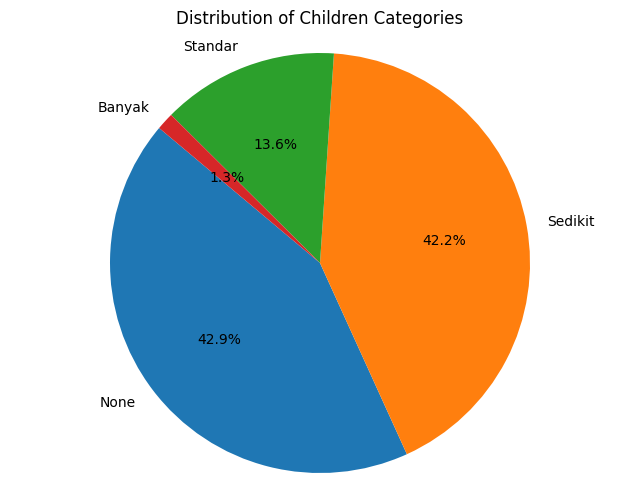

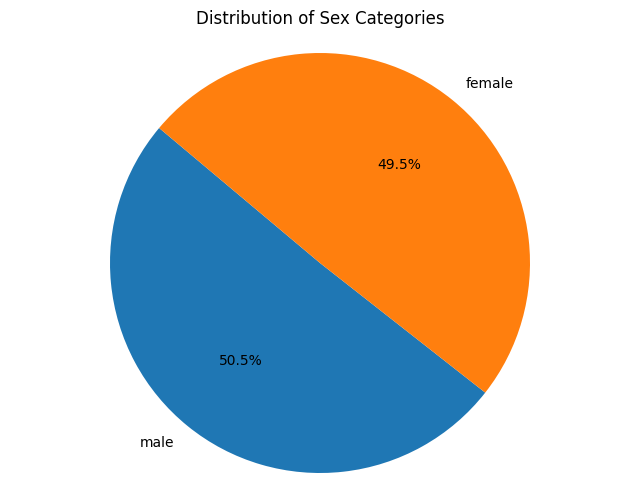

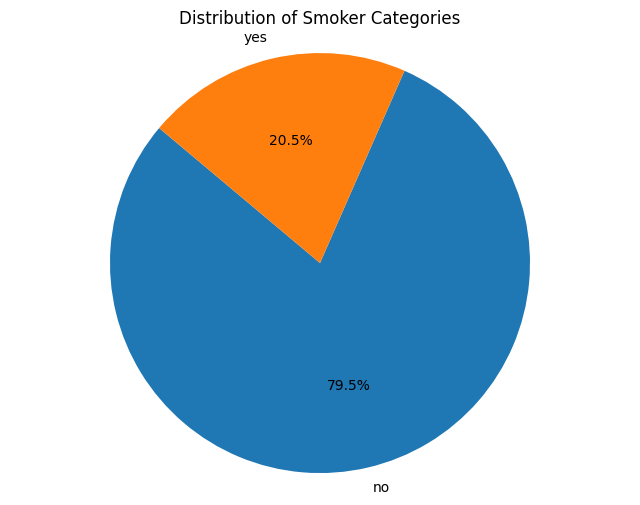

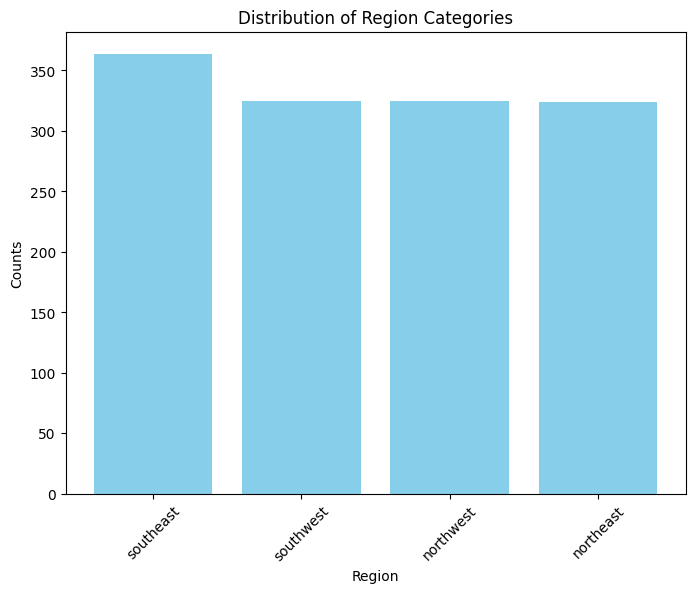

In [5]:
# Menghitung jumlah untuk setiap kategori
age_counts = df['age_category'].value_counts()
bmi_counts = df['bmi_category'].value_counts()
children_counts = df['children_category'].value_counts()
sex_counts = df['sex'].value_counts()
smoker_counts = df['smoker'].value_counts()
region_counts = df['region'].value_counts()

# Membuat pie chart untuk age_category
plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Categories')
plt.axis('equal')
plt.show()

# Membuat pie chart untuk bmi_category
plt.figure(figsize=(8, 6))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of BMI Categories')
plt.axis('equal')
plt.show()

# Membuat pie chart untuk children_category
plt.figure(figsize=(8, 6))
plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Children Categories')
plt.axis('equal')
plt.show()

# Membuat pie chart untuk sex
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sex Categories')
plt.axis('equal')
plt.show()

# Membuat pie chart untuk smoker
plt.figure(figsize=(8, 6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Smoker Categories')
plt.axis('equal')
plt.show()

# Membuat bar chart untuk region
plt.figure(figsize=(8, 6))
plt.bar(region_counts.index, region_counts.values, color='skyblue')
plt.title('Distribution of Region Categories')
plt.xlabel('Region')
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih jelas
plt.show()

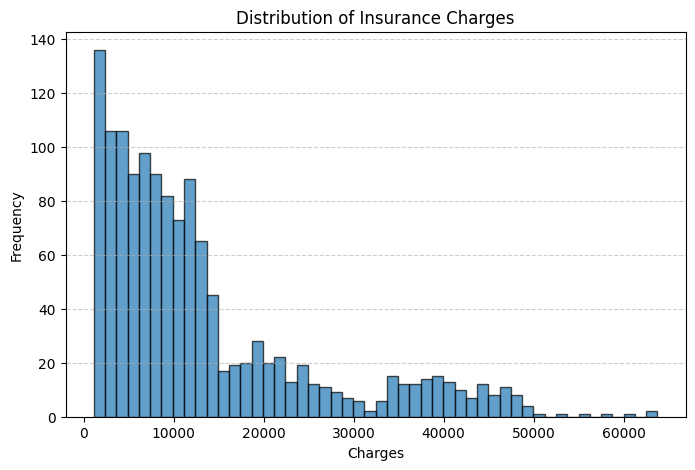

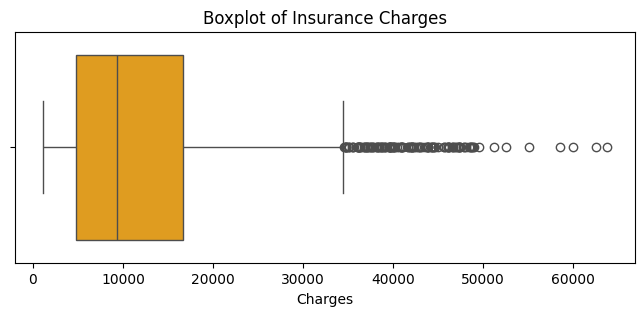

In [6]:
# Histogram charges
plt.figure(figsize=(8,5))
plt.hist(df['charges'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Boxplot charges
plt.figure(figsize=(8,3))
sns.boxplot(x=df['charges'], color="orange")
plt.title("Boxplot of Insurance Charges")
plt.xlabel("Charges")
plt.show()

## Uji Korelasi

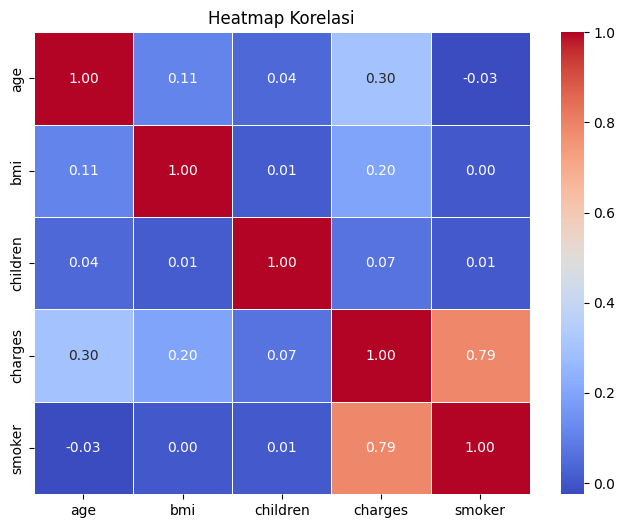

In [22]:
korelasi = df_new[['age', 'bmi', 'children', 'charges', 'smoker']]
# Menghitung korelasi
correlation = korelasi.corr()
correlation

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()

## One Way Anova

Age - Charges

In [8]:
# One-Way ANOVA berdasarkan kategori usia
model = ols('charges ~ C(age_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nOne-Way ANOVA with age_category as a Factor:")
print(anova_table)

# Pengujian hipotesis
alpha = 0.05  # Level signifikansi

H0 = "Tidak ada perbedaan signifikan dalam biaya asuransi antara kategori usia."
H1 = "Ada perbedaan signifikan dalam biaya asuransi antara kategori usia."

# Ambil p-value dan F-hitung
p_value = anova_table['PR(>F)'][0]
f_hitung = anova_table['F'][0]

# Ambil derajat kebebasan dari tabel ANOVA
df1 = anova_table['df'][0]   # df antara kelompok (k-1)
df2 = anova_table['df'][1]   # df dalam kelompok (N-k)

# Hitung F kritis (F tabel)
f_kritis = stats.f.ppf(1 - alpha, df1, df2)

# Keputusan
if f_hitung > f_kritis:
    decision = "Tolak H0"
    conclusion = H1
else:
    decision = "Gagal Tolak H0"
    conclusion = H0

# Cetak hasil
print("\nHasil ANOVA:")
print(f"Nilai F-hitung  : {f_hitung:.4f}")
print(f"Nilai F-kritis  : {f_kritis:.4f} (alpha={alpha}, df1={df1:.0f}, df2={df2:.0f})")
print(f"p-value         : {p_value:.4f}")
print(f"Keputusan       : {decision}")
print(f"Kesimpulan      : {conclusion}")


One-Way ANOVA with age_category as a Factor:
                       sum_sq      df          F        PR(>F)
C(age_category)  1.498926e+10     2.0  55.252143  8.826862e-24
Residual         1.810850e+11  1335.0        NaN           NaN

Hasil ANOVA:
Nilai F-hitung  : 55.2521
Nilai F-kritis  : 3.0025 (alpha=0.05, df1=2, df2=1335)
p-value         : 0.0000
Keputusan       : Tolak H0
Kesimpulan      : Ada perbedaan signifikan dalam biaya asuransi antara kategori usia.


C:\Users\72535\AppData\Local\Temp\ipykernel_18464\986022377.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\986022377.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_hitung = anova_table['F'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\986022377.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1 = anova_table['df'][0]   # 

Sex - Charges

In [9]:
# One-Way ANOVA berdasarkan kategori jenis kelamin
model = ols('charges ~ C(sex)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nOne-Way ANOVA with sex as a Factor:")
print(anova_table)

# Pengujian hipotesis
alpha = 0.05  # Level signifikansi

H0 = "Tidak ada perbedaan signifikan dalam biaya asuransi antara kategori jenis kelamin."
H1 = "Ada perbedaan signifikan dalam biaya asuransi antara kategori jenis kelamin."

# Ambil p-value dan F-hitung
p_value = anova_table['PR(>F)'][0]
f_hitung = anova_table['F'][0]

# Ambil derajat kebebasan dari tabel ANOVA
df1 = anova_table['df'][0]   # df antara kelompok (k-1)
df2 = anova_table['df'][1]   # df dalam kelompok (N-k)

# Hitung F kritis (F tabel)
f_kritis = stats.f.ppf(1 - alpha, df1, df2)

# Keputusan
if f_hitung > f_kritis:
    decision = "Tolak H0"
    conclusion = H1
else:
    decision = "Gagal Tolak H0"
    conclusion = H0

# Cetak hasil
print("\nHasil ANOVA:")
print(f"Nilai F-hitung  : {f_hitung:.4f}")
print(f"Nilai F-kritis  : {f_kritis:.4f} (alpha={alpha}, df1={df1:.0f}, df2={df2:.0f})")
print(f"p-value         : {p_value:.4f}")
print(f"Keputusan       : {decision}")
print(f"Kesimpulan      : {conclusion}")


One-Way ANOVA with sex as a Factor:
                sum_sq      df         F    PR(>F)
C(sex)    6.435902e+08     1.0  4.399702  0.036133
Residual  1.954306e+11  1336.0       NaN       NaN

Hasil ANOVA:
Nilai F-hitung  : 4.3997
Nilai F-kritis  : 3.8484 (alpha=0.05, df1=1, df2=1336)
p-value         : 0.0361
Keputusan       : Tolak H0
Kesimpulan      : Ada perbedaan signifikan dalam biaya asuransi antara kategori jenis kelamin.


C:\Users\72535\AppData\Local\Temp\ipykernel_18464\509322688.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\509322688.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_hitung = anova_table['F'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\509322688.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1 = anova_table['df'][0]   # 

bmi - charges

In [10]:
# One-Way ANOVA berdasarkan kategori BMI
model = ols('charges ~ C(bmi_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nOne-Way ANOVA with bmi_category as a Factor:")
print(anova_table)

# Pengujian hipotesis
alpha = 0.05  # Level signifikansi

H0 = "Tidak ada perbedaan signifikan dalam biaya asuransi antara kategori BMI."
H1 = "Ada perbedaan signifikan dalam biaya asuransi antara kategori BMI."

# Ambil p-value dan F-hitung
p_value = anova_table['PR(>F)'][0]
f_hitung = anova_table['F'][0]

# Ambil derajat kebebasan dari tabel ANOVA
df1 = anova_table['df'][0]   # df antara kelompok (k-1)
df2 = anova_table['df'][1]   # df dalam kelompok (N-k)

# Hitung F kritis (F tabel)
f_kritis = stats.f.ppf(1 - alpha, df1, df2)

# Keputusan
if f_hitung > f_kritis:
    decision = "Tolak H0"
    conclusion = H1
else:
    decision = "Gagal Tolak H0"
    conclusion = H0

# Cetak hasil
print("\nHasil ANOVA:")
print(f"Nilai F-hitung  : {f_hitung:.4f}")
print(f"Nilai F-kritis  : {f_kritis:.4f} (alpha={alpha}, df1={df1:.0f}, df2={df2:.0f})")
print(f"p-value         : {p_value:.4f}")
print(f"Keputusan       : {decision}")
print(f"Kesimpulan      : {conclusion}")


One-Way ANOVA with bmi_category as a Factor:
                       sum_sq      df          F        PR(>F)
C(bmi_category)  7.955555e+09     3.0  18.804992  5.997613e-12
Residual         1.881187e+11  1334.0        NaN           NaN

Hasil ANOVA:
Nilai F-hitung  : 18.8050
Nilai F-kritis  : 2.6116 (alpha=0.05, df1=3, df2=1334)
p-value         : 0.0000
Keputusan       : Tolak H0
Kesimpulan      : Ada perbedaan signifikan dalam biaya asuransi antara kategori BMI.


C:\Users\72535\AppData\Local\Temp\ipykernel_18464\2527111763.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\2527111763.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_hitung = anova_table['F'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\2527111763.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1 = anova_table['df'][0]  

children - charges

In [11]:
# One-Way ANOVA berdasarkan kategori anak
model = ols('charges ~ C(children_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nOne-Way ANOVA with children_category as a Factor:")
print(anova_table)

# Pengujian hipotesis
alpha = 0.05  # Level signifikansi

H0 = "Tidak ada perbedaan signifikan dalam biaya asuransi antara kategori anak."
H1 = "Ada perbedaan signifikan dalam biaya asuransi antara kategori anak."

# Ambil p-value dan F-hitung
p_value = anova_table['PR(>F)'][0]
f_hitung = anova_table['F'][0]

# Ambil derajat kebebasan dari tabel ANOVA
df1 = anova_table['df'][0]   # df antara kelompok (k-1)
df2 = anova_table['df'][1]   # df dalam kelompok (N-k)

# Hitung F kritis (F tabel)
f_kritis = stats.f.ppf(1 - alpha, df1, df2)

# Keputusan
if f_hitung > f_kritis:
    decision = "Tolak H0"
    conclusion = H1
else:
    decision = "Gagal Tolak H0"
    conclusion = H0

# Cetak hasil
print("\nHasil ANOVA:")
print(f"Nilai F-hitung  : {f_hitung:.4f}")
print(f"Nilai F-kritis  : {f_kritis:.4f} (alpha={alpha}, df1={df1:.0f}, df2={df2:.0f})")
print(f"p-value         : {p_value:.4f}")
print(f"Keputusan       : {decision}")
print(f"Kesimpulan      : {conclusion}")


One-Way ANOVA with children_category as a Factor:
                            sum_sq      df         F    PR(>F)
C(children_category)  1.591613e+09     3.0  3.639078  0.012411
Residual              1.944826e+11  1334.0       NaN       NaN

Hasil ANOVA:
Nilai F-hitung  : 3.6391
Nilai F-kritis  : 2.6116 (alpha=0.05, df1=3, df2=1334)
p-value         : 0.0124
Keputusan       : Tolak H0
Kesimpulan      : Ada perbedaan signifikan dalam biaya asuransi antara kategori anak.


C:\Users\72535\AppData\Local\Temp\ipykernel_18464\1543007265.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\1543007265.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_hitung = anova_table['F'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\1543007265.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1 = anova_table['df'][0]  

smoker - charges

In [12]:
# One-Way ANOVA berdasarkan kategori perokok
model = ols('charges ~ C(smoker)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nOne-Way ANOVA with smoker as a Factor:")
print(anova_table)

# Pengujian hipotesis
alpha = 0.05  # Level signifikansi

H0 = "Tidak ada perbedaan signifikan dalam biaya asuransi antara kategori perokok."
H1 = "Ada perbedaan signifikan dalam biaya asuransi antara kategori perokok."

# Ambil p-value dan F-hitung
p_value = anova_table['PR(>F)'][0]
f_hitung = anova_table['F'][0]

# Ambil derajat kebebasan dari tabel ANOVA
df1 = anova_table['df'][0]   # df antara kelompok (k-1)
df2 = anova_table['df'][1]   # df dalam kelompok (N-k)

# Hitung F kritis (F tabel)
f_kritis = stats.f.ppf(1 - alpha, df1, df2)

# Keputusan
if f_hitung > f_kritis:
    decision = "Tolak H0"
    conclusion = H1
else:
    decision = "Gagal Tolak H0"
    conclusion = H0

# Cetak hasil
print("\nHasil ANOVA:")
print(f"Nilai F-hitung  : {f_hitung:.4f}")
print(f"Nilai F-kritis  : {f_kritis:.4f} (alpha={alpha}, df1={df1:.0f}, df2={df2:.0f})")
print(f"p-value         : {p_value:.4f}")
print(f"Keputusan       : {decision}")
print(f"Kesimpulan      : {conclusion}")


One-Way ANOVA with smoker as a Factor:
                 sum_sq      df            F         PR(>F)
C(smoker)  1.215199e+11     1.0  2177.614868  8.271436e-283
Residual   7.455432e+10  1336.0          NaN            NaN

Hasil ANOVA:
Nilai F-hitung  : 2177.6149
Nilai F-kritis  : 3.8484 (alpha=0.05, df1=1, df2=1336)
p-value         : 0.0000
Keputusan       : Tolak H0
Kesimpulan      : Ada perbedaan signifikan dalam biaya asuransi antara kategori perokok.


C:\Users\72535\AppData\Local\Temp\ipykernel_18464\416077338.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\416077338.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_hitung = anova_table['F'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\416077338.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1 = anova_table['df'][0]   # 

region - charges

In [13]:
# One-Way ANOVA berdasarkan kategori region
model = ols('charges ~ C(region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nOne-Way ANOVA with region as a Factor:")
print(anova_table)

# Pengujian hipotesis
alpha = 0.05  # Level signifikansi

H0 = "Tidak ada perbedaan signifikan dalam biaya asuransi antara kategori region."
H1 = "Ada perbedaan signifikan dalam biaya asuransi antara kategori region."

# Ambil p-value dan F-hitung
p_value = anova_table['PR(>F)'][0]
f_hitung = anova_table['F'][0]

# Ambil derajat kebebasan dari tabel ANOVA
df1 = anova_table['df'][0]   # df antara kelompok (k-1)
df2 = anova_table['df'][1]   # df dalam kelompok (N-k)

# Hitung F kritis (F tabel)
f_kritis = stats.f.ppf(1 - alpha, df1, df2)

# Keputusan
if f_hitung > f_kritis:
    decision = "Tolak H0"
    conclusion = H1
else:
    decision = "Gagal Tolak H0"
    conclusion = H0

# Cetak hasil
print("\nHasil ANOVA:")
print(f"Nilai F-hitung  : {f_hitung:.4f}")
print(f"Nilai F-kritis  : {f_kritis:.4f} (alpha={alpha}, df1={df1:.0f}, df2={df2:.0f})")
print(f"p-value         : {p_value:.4f}")
print(f"Keputusan       : {decision}")
print(f"Kesimpulan      : {conclusion}")


One-Way ANOVA with region as a Factor:
                 sum_sq      df         F    PR(>F)
C(region)  1.300760e+09     3.0  2.969627  0.030893
Residual   1.947735e+11  1334.0       NaN       NaN

Hasil ANOVA:
Nilai F-hitung  : 2.9696
Nilai F-kritis  : 2.6116 (alpha=0.05, df1=3, df2=1334)
p-value         : 0.0309
Keputusan       : Tolak H0
Kesimpulan      : Ada perbedaan signifikan dalam biaya asuransi antara kategori region.


C:\Users\72535\AppData\Local\Temp\ipykernel_18464\4223048760.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\4223048760.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_hitung = anova_table['F'][0]
C:\Users\72535\AppData\Local\Temp\ipykernel_18464\4223048760.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1 = anova_table['df'][0]  

## Two Ways Anova

Age, Smoker - Charges

In [14]:
# 1) Two-Way ANOVA
model = ols('charges ~ C(age_category) * C(smoker)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTwo-Way ANOVA with age_category and smoker as Factors:")
print(anova_table)

# 2) Level signifikansi
alpha = 0.05

# 3) Loop cek semua faktor + interaksi
for faktor in anova_table.index:
    if faktor == "Residual":
        continue
    
    f_hitung = anova_table.loc[faktor, "F"]
    p_value = anova_table.loc[faktor, "PR(>F)"]
    df1 = int(anova_table.loc[faktor, "df"])      # df faktor
    df2 = int(anova_table.loc["Residual", "df"])  # df residual
    
    # Hitung F-kritis
    f_kritis = stats.f.ppf(1 - alpha, df1, df2)
    
    # Keputusan
    if f_hitung > f_kritis:
        decision = "Tolak H0"
    else:
        decision = "Gagal Tolak H0"
    
    # Cetak hasil per faktor
    print(f"\n=== Uji untuk {faktor} ===")
    print(f"F-hitung : {f_hitung:.4f}")
    print(f"F-kritis : {f_kritis:.4f} (alpha={alpha}, df1={df1}, df2={df2})")
    print(f"p-value  : {p_value:.6f}")
    print(f"Keputusan: {decision}")


Two-Way ANOVA with age_category and smoker as Factors:
                                 sum_sq      df            F        PR(>F)
C(age_category)            1.667833e+10     2.0   192.305426  4.249708e-74
C(smoker)                  1.232090e+11     1.0  2841.262866  0.000000e+00
C(age_category):C(smoker)  1.149365e+08     2.0     1.325247  2.660874e-01
Residual                   5.776106e+10  1332.0          NaN           NaN

=== Uji untuk C(age_category) ===
F-hitung : 192.3054
F-kritis : 3.0025 (alpha=0.05, df1=2, df2=1332)
p-value  : 0.000000
Keputusan: Tolak H0

=== Uji untuk C(smoker) ===
F-hitung : 2841.2629
F-kritis : 3.8484 (alpha=0.05, df1=1, df2=1332)
p-value  : 0.000000
Keputusan: Tolak H0

=== Uji untuk C(age_category):C(smoker) ===
F-hitung : 1.3252
F-kritis : 3.0025 (alpha=0.05, df1=2, df2=1332)
p-value  : 0.266087
Keputusan: Gagal Tolak H0


Smoker, BMI - Charges

In [15]:
# 1) Two-Way ANOVA
model = ols('charges ~ C(bmi_category) * C(smoker)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTwo-Way ANOVA with bmi_category and smoker as Factors:")
print(anova_table)

# 2) Level signifikansi
alpha = 0.05

# 3) Loop cek semua faktor + interaksi
for faktor in anova_table.index:
    if faktor == "Residual":
        continue
    
    f_hitung = anova_table.loc[faktor, "F"]
    p_value = anova_table.loc[faktor, "PR(>F)"]
    df1 = int(anova_table.loc[faktor, "df"])      # df faktor
    df2 = int(anova_table.loc["Residual", "df"])  # df residual
    
    # Hitung F-kritis
    f_kritis = stats.f.ppf(1 - alpha, df1, df2)
    
    # Keputusan
    if f_hitung > f_kritis:
        decision = "Tolak H0"
    else:
        decision = "Gagal Tolak H0"
    
    # Cetak hasil per faktor
    print(f"\n=== Uji untuk {faktor} ===")
    print(f"F-hitung : {f_hitung:.4f}")
    print(f"F-kritis : {f_kritis:.4f} (alpha={alpha}, df1={df1}, df2={df2})")
    print(f"p-value  : {p_value:.6f}")
    print(f"Keputusan: {decision}")


Two-Way ANOVA with bmi_category and smoker as Factors:
                                 sum_sq      df            F         PR(>F)
C(bmi_category)            8.283097e+09     3.0    80.234289   1.040883e-47
C(smoker)                  1.218474e+11     1.0  3540.829000   0.000000e+00
C(bmi_category):C(smoker)  2.050310e+10     3.0   198.603422  2.011173e-106
Residual                   4.576812e+10  1330.0          NaN            NaN

=== Uji untuk C(bmi_category) ===
F-hitung : 80.2343
F-kritis : 2.6116 (alpha=0.05, df1=3, df2=1330)
p-value  : 0.000000
Keputusan: Tolak H0

=== Uji untuk C(smoker) ===
F-hitung : 3540.8290
F-kritis : 3.8485 (alpha=0.05, df1=1, df2=1330)
p-value  : 0.000000
Keputusan: Tolak H0

=== Uji untuk C(bmi_category):C(smoker) ===
F-hitung : 198.6034
F-kritis : 2.6116 (alpha=0.05, df1=3, df2=1330)
p-value  : 0.000000
Keputusan: Tolak H0


Age, BMI - Charges

In [16]:
# 1) Two-Way ANOVA
model = ols('charges ~ C(bmi_category) * C(age_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTwo-Way ANOVA with bmi_category and age_category as Factors:")
print(anova_table)

# 2) Level signifikansi
alpha = 0.05

# 3) Loop cek semua faktor + interaksi
for faktor in anova_table.index:
    if faktor == "Residual":
        continue
    
    f_hitung = anova_table.loc[faktor, "F"]
    p_value = anova_table.loc[faktor, "PR(>F)"]
    df1 = int(anova_table.loc[faktor, "df"])      # df faktor
    df2 = int(anova_table.loc["Residual", "df"])  # df residual
    
    # Hitung F-kritis
    f_kritis = stats.f.ppf(1 - alpha, df1, df2)
    
    # Keputusan
    if f_hitung > f_kritis:
        decision = "Tolak H0"
    else:
        decision = "Gagal Tolak H0"
    
    # Cetak hasil per faktor
    print(f"\n=== Uji untuk {faktor} ===")
    print(f"F-hitung : {f_hitung:.4f}")
    print(f"F-kritis : {f_kritis:.4f} (alpha={alpha}, df1={df1}, df2={df2})")
    print(f"p-value  : {p_value:.6f}")
    print(f"Keputusan: {decision}")


Two-Way ANOVA with bmi_category and age_category as Factors:
                                       sum_sq      df          F        PR(>F)
C(bmi_category)                  6.417252e+09     3.0  16.244441  2.261615e-10
C(age_category)                  1.345096e+10     2.0  51.074034  4.282532e-22
C(bmi_category):C(age_category)  5.871150e+07     6.0   0.074310  9.984303e-01
Residual                         1.746090e+11  1326.0        NaN           NaN

=== Uji untuk C(bmi_category) ===
F-hitung : 16.2444
F-kritis : 2.6116 (alpha=0.05, df1=3, df2=1326)
p-value  : 0.000000
Keputusan: Tolak H0

=== Uji untuk C(age_category) ===
F-hitung : 51.0740
F-kritis : 3.0025 (alpha=0.05, df1=2, df2=1326)
p-value  : 0.000000
Keputusan: Tolak H0

=== Uji untuk C(bmi_category):C(age_category) ===
F-hitung : 0.0743
F-kritis : 2.1054 (alpha=0.05, df1=6, df2=1326)
p-value  : 0.998430
Keputusan: Gagal Tolak H0


## Multi Ways Anova

In [17]:
# Multi-Way ANOVA (3 faktor)
model = ols('charges ~ age_category * bmi_category * smoker', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nMulti-Way ANOVA (age_category, bmi_category, smoker):")
print(anova_table)

# Pengujian Hipotesis
alpha = 0.05  # level signifikansi

H0 = "Tidak ada perbedaan signifikan dalam charges berdasarkan kategori usia, BMI, dan status smoker."
H1 = "Ada perbedaan signifikan dalam charges berdasarkan kategori usia, BMI, dan status smoker."

# 3) Loop cek semua faktor + interaksi
for faktor in anova_table.index:
    if faktor == "Residual":
        continue
    
    f_hitung = anova_table.loc[faktor, "F"]
    p_value = anova_table.loc[faktor, "PR(>F)"]
    df1 = int(anova_table.loc[faktor, "df"])      # df faktor
    df2 = int(anova_table.loc["Residual", "df"])  # df residual
    
    # Hitung F-kritis
    f_kritis = stats.f.ppf(1 - alpha, df1, df2)
    
    # Keputusan
    if f_hitung > f_kritis:
        decision = "Tolak H0"
    else:
        decision = "Gagal Tolak H0"
    
    # Cetak hasil per faktor
    print(f"\n=== Uji untuk {faktor} ===")
    print(f"F-hitung : {f_hitung:.4f}")
    print(f"F-kritis : {f_kritis:.4f} (alpha={alpha}, df1={df1}, df2={df2})")
    print(f"p-value  : {p_value:.6f}")
    print(f"Keputusan: {decision}")



Multi-Way ANOVA (age_category, bmi_category, smoker):
                                        sum_sq      df            F  \
age_category                      1.529061e+10     2.0   330.749699   
bmi_category                      6.516567e+09     3.0    93.972852   
smoker                            1.234517e+11     1.0  5340.743699   
age_category:bmi_category         5.294714e+07     6.0     0.381765   
age_category:smoker               2.560787e+06     2.0     0.055392   
bmi_category:smoker               2.073358e+10     3.0   298.990843   
age_category:bmi_category:smoker  2.633549e+07     6.0     0.189887   
Residual                          3.039632e+10  1315.0          NaN   

                                         PR(>F)  
age_category                      4.381382e-117  
bmi_category                       4.186626e-55  
smoker                             0.000000e+00  
age_category:bmi_category          8.909735e-01  
age_category:smoker                9.461163e-01  
bmi_c

## T-test for sex and smoker

In [18]:
# t-test untuk sex
male_charges = df[df['sex'] == 'male']['charges']
female_charges = df[df['sex'] == 'female']['charges']

t_stat_sex, p_val_sex = stats.ttest_ind(male_charges, female_charges, equal_var=True)

print("=== Independent t-test: Sex vs Charges ===")
print(f"t-statistic : {t_stat_sex:.4f}")
print(f"p-value     : {p_val_sex:.4f}")
if p_val_sex < 0.05:
    print("👉 Kesimpulan: Ada perbedaan signifikan charges antara pria dan wanita.")
else:
    print("👉 Kesimpulan: Tidak ada perbedaan signifikan charges antara pria dan wanita.")


# t-test untuk smoker
smoker_charges = df[df['smoker'] == 'yes']['charges']
nonsmoker_charges = df[df['smoker'] == 'no']['charges']

t_stat_smoker, p_val_smoker = stats.ttest_ind(smoker_charges, nonsmoker_charges, equal_var=True)

print("\n=== Independent t-test: Smoker vs Charges ===")
print(f"t-statistic : {t_stat_smoker:.4f}")
print(f"p-value     : {p_val_smoker:.4f}")
if p_val_smoker < 0.05:
    print("👉 Kesimpulan: Ada perbedaan signifikan charges antara perokok dan bukan perokok.")
else:
    print("👉 Kesimpulan: Tidak ada perbedaan signifikan charges antara perokok dan bukan perokok.")


=== Independent t-test: Sex vs Charges ===
t-statistic : 2.0975
p-value     : 0.0361
👉 Kesimpulan: Ada perbedaan signifikan charges antara pria dan wanita.

=== Independent t-test: Smoker vs Charges ===
t-statistic : 46.6649
p-value     : 0.0000
👉 Kesimpulan: Ada perbedaan signifikan charges antara perokok dan bukan perokok.
